In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.image as mpimg

In [19]:
#YHM Data found here: https://hamilton.weatherstats.ca/download.html (LOOK FOR DAILY CLIMATE AND DOWNLOAD MONTHLY)
Yearly = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Yearly.xlsx')
Yearly.tail(10)

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
35,2024-02-05,0.9,-1.40,-1.90,-4.7,NaN,-8.0,100,88.8,87.0,...,NaN,NaN,8,3.4,4.0,0,NaN,NaN,NaN,NaN
36,2024-02-06,3.6,-1.50,-0.90,-5.4,NaN,-9.0,99,80.5,75.5,...,NaN,NaN,5,2.1,2.5,0,NaN,NaN,NaN,NaN
37,2024-02-07,7.5,0.23,1.50,-4.5,NaN,-8.0,88,75.0,69.5,...,NaN,NaN,8,5.5,5.0,2,NaN,NaN,NaN,NaN
38,2024-02-08,7.5,2.13,2.15,-3.2,NaN,-7.0,100,83.2,78.0,...,NaN,NaN,8,6.2,5.5,3,NaN,NaN,NaN,NaN
39,2024-02-09,14.3,9.93,9.94,5.6,NaN,NaN,82,72.6,74.0,...,NaN,NaN,8,6.0,5.0,2,NaN,NaN,NaN,NaN
40,2024-02-10,10.0,5.99,5.70,1.4,NaN,NaN,100,76.0,78.5,...,NaN,NaN,8,4.7,4.5,1,NaN,NaN,NaN,NaN
41,2024-02-11,3.3,0.75,1.85,0.4,NaN,-5.0,78,72.1,69.0,...,NaN,NaN,8,7.8,7.5,7,NaN,NaN,NaN,NaN
42,2024-02-12,3.6,-0.13,-0.24,-4.1,NaN,-7.0,95,72.2,73.0,...,NaN,NaN,8,5.4,4.0,0,NaN,NaN,NaN,NaN
43,2024-02-13,4.1,-1.43,-0.15,-4.4,NaN,-10.0,99,70.4,74.5,...,NaN,NaN,8,6.2,4.5,1,NaN,NaN,NaN,NaN
44,2024-02-14,-0.6,-4.11,-4.55,-8.5,NaN,-14.0,74,58.7,61.0,...,NaN,NaN,8,4.4,4.5,1,NaN,NaN,NaN,NaN


In [20]:
#YEARLY BREAKDOWN

#HIGHEST MAX TEMP
Highest_Temp = Yearly['max_temperature'].max()  
Date_Highest_Temp = Yearly.loc[Yearly['max_temperature'].idxmax(), 'date'].date()
print(f"Highest High Temperature = {Highest_Temp}°C on {Date_Highest_Temp}")

#LOWEST HIGH
Lowest_High = Yearly['max_temperature'].min()
Date_Lowest_High = Yearly.loc[Yearly['max_temperature'].idxmin(), 'date'].date()
print(f"Lowest High Temperature = {Lowest_High}°C on {Date_Lowest_High}")

#LOWEST LOW TEMP
Low_Low = Yearly['min_temperature'].min()  
Date_Low_Low = Yearly.loc[Yearly['min_temperature'].idxmin(), 'date'].date()
print(f"Lowest Low Temperature = {Low_Low}°C on {Date_Low_Low}")

#HIGHEST SUSTAINED WIND
Highest_Sustained_Wind = Yearly['max_wind_speed'].max()
Date_Highest_Wind = Yearly.loc[Yearly['max_wind_speed'].idxmax(), 'date'].date()
print(f"Highest Recorded Sustained Wind Speed = {Highest_Sustained_Wind} km/h on {Date_Highest_Wind}")

#HIGHEST WIND GUST
Highest_Wind_Gust = Yearly['max_wind_gust'].max()
Date_Highest_Gust = Yearly.loc[Yearly['max_wind_gust'].idxmax(), 'date'].date()
print(f"Highest Recorded Wind Gust = {Highest_Wind_Gust} km/h on {Date_Highest_Wind}")

#TOTAL YEARLY PRECIP
Total = Yearly['precipitation'].sum().round(2)   
print(f"Total Precipitation = {Total} mm")

#TOTAL YEARLY RAIN
Total_Rain = Yearly['rain'].sum().round(2)   
print(f"Total Yearly Rain = {Total_Rain} mm")

#TOTAL YEARLY SNOW
Total_Snow = Yearly['snow'].sum().round(2)   
print(f"Total Yearly Snow = {Total_Snow} cm")

#HIGHEST DAY PRECIPITATION TOTAL
Highest_Precip = Yearly['precipitation'].max()   
Date_Highest_Precipitation = Yearly.loc[Yearly['precipitation'].idxmax(), 'date'].date()
print(f"Highest Precipitation Day & Total = {Highest_Precip} mm on {Date_Highest_Precipitation}")

#HIGHEST DAY RAIN TOTAL
Highest_Rain = Yearly['rain'].max()  
Highest_Rain_Day = Yearly.loc[Yearly['rain'].idxmax(), 'date'].date()
print(f"Highest Rainfall Day & Total = {Highest_Rain} mm on {Highest_Rain_Day}")

#HIGHEST DAY SNOW TOTAL
Highest_Snow = Yearly['snow'].max()
Highest_Snow_Day = Yearly.loc[Yearly['snow'].idxmax(), 'date'].date()   
print(f"Highest Snowfall Day & Total = {Highest_Snow} cm  on {Highest_Snow_Day}")

#HIGHEST BAROMETRIC PRESSURE
Highest_Pressure = Yearly['max_pressure_sea'].max() *10
Date_Highest_Pressure = Yearly.loc[Yearly['max_pressure_sea'].idxmax(), 'date'].date()
print(f"Highest Barometric Pressure = {Highest_Pressure:.1f} mbar on {Date_Highest_Pressure}")

#LOWEST BAROMETRIC PRESSURE
Lowest_Pressure = Yearly['min_pressure_sea'].min() *10
Date_Lowest_Pressure = Yearly.loc[Yearly['min_pressure_sea'].idxmin(), 'date'].date()
print(f"Lowest Barometric Pressure = {Lowest_Pressure:.1f} mbar on {Date_Lowest_Pressure}")

#For Yearly Average
Yearly_Health = Yearly['avg_health_index'].mean() 
print(f"Yearly Average Health Index = {Yearly_Health:.2f}")

#For Highest Health Index Yearly
Highest_Health = Yearly['max_health_index'].max()  
Date_Highest_Health = Yearly.loc[Yearly['max_health_index'].idxmax(), 'date'].date()
print(f"Highest Health Index = {Highest_Health:.2f} on {Date_Highest_Health}")

Highest High Temperature = 14.3°C on 2024-02-09
Lowest High Temperature = -9.0°C on 2024-01-15
Lowest Low Temperature = -17.1°C on 2024-01-20
Highest Recorded Sustained Wind Speed = 58 km/h on 2024-01-13
Highest Recorded Wind Gust = 87.0 km/h on 2024-01-13
Total Precipitation = 93.0 mm
Total Yearly Rain = 71.8 mm
Total Yearly Snow = 21.6 cm
Highest Precipitation Day & Total = 29.9 mm on 2024-01-09
Highest Rainfall Day & Total = 26.9 mm on 2024-01-09
Highest Snowfall Day & Total = 6.8 cm  on 2024-01-23
Highest Barometric Pressure = 1034.9 mbar on 2024-01-21
Lowest Barometric Pressure = 979.1 mbar on 2024-01-09
Yearly Average Health Index = 2.36
Highest Health Index = 4.50 on 2024-02-06


In [21]:
#CONVERTING DATASET TO GET MONTHLY AVERAGES

#Convert the 'Day' column to datetime format
Yearly['date'] = pd.to_datetime(Yearly['date'])  

#Extract the month from the 'Day' column and create a new column 'Month'
Yearly['Month'] = Yearly['date'].dt.to_period('M')

#Group the DataFrame by 'Month' and calculate mean for 'Max Temp' and 'Min Temp', and sum for 'Total Precip', 'Rain', and 'Snow'
monthly_averages = Yearly.groupby('Month').agg({'max_temperature': 'mean','min_temperature': 'mean','precipitation': 'sum','rain': 'sum','snow': 'sum'}).round(1)

#Resetting index to have 'Month' as a column again
monthly_averages = monthly_averages.reset_index()

#Convert the 'Month' period labels to text month names
monthly_averages['Month'] = monthly_averages['Month'].dt.to_timestamp().dt.strftime('%B')
monthly_averages.head(12)

#Monthly Precip Average
Average_Precipitation = monthly_averages['precipitation'].mean()
print(f"Average Precipitation Per Month = {Average_Precipitation} mm")

Average_Rainfall = monthly_averages['rain'].mean()
print(f"Average Rainfall Per Month = {Average_Rainfall} mm")

Average_Snowfall = monthly_averages['snow'].mean()
print(f"Average Snowfall Per Month = {Average_Snowfall} mm")

#Average Yearly High Temperature
Yearly_High = monthly_averages['max_temperature'].median()
print(f"Average Yearly High Temperature  = {Yearly_High}°C")

#Average Yearly Low Temperature
Yearly_Low = monthly_averages['min_temperature'].median()
print(f"Average Yearly Low Temperature = {Yearly_Low}°C")

monthly_averages.head(15)

#Sorted_Avgs = monthly_averages.sort_values(by='Total Precip', ascending=False)
#Sorted_Avgs.head(12)




#MONTHLY BREAKDOWN (CLIMATOLOGY)
Climatology = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM Climate Normals 1981-2010.xlsx')

#Average Yearly High Temperature
Yearly_High_Climo = Climatology['Daily Maximum Temperature'].median()
print(f"Average Yearly High Climo Temperature  = {Yearly_High_Climo}°C")

#Average Yearly Low Temperature
Yearly_Low_Climo = Climatology['Daily Minimum Temperature'].median()
print(f"Average Yearly Low Climo Temperature = {Yearly_Low_Climo}°C")

Climatology.head(15)

#Sorted_Climo = Climatology.sort_values(by='Precipitation', ascending=False)
#Sorted_Climo.head(12)




#Calculating %s vs Climatology
observed_precip = 2  # mm
expected_precip = 33.5 # mm

percentage_higher = ((observed_precip - expected_precip) / expected_precip) * 100
print(f"Percentage Higher than Expected: {percentage_higher:.0f}%")



Average Precipitation Per Month = 46.5 mm
Average Rainfall Per Month = 35.9 mm
Average Snowfall Per Month = 10.8 mm
Average Yearly High Temperature  = 2.5°C
Average Yearly Low Temperature = -3.9°C
Average Yearly High Climo Temperature  = 12.95°C
Average Yearly Low Climo Temperature = 3.0°C
Percentage Higher than Expected: -94%


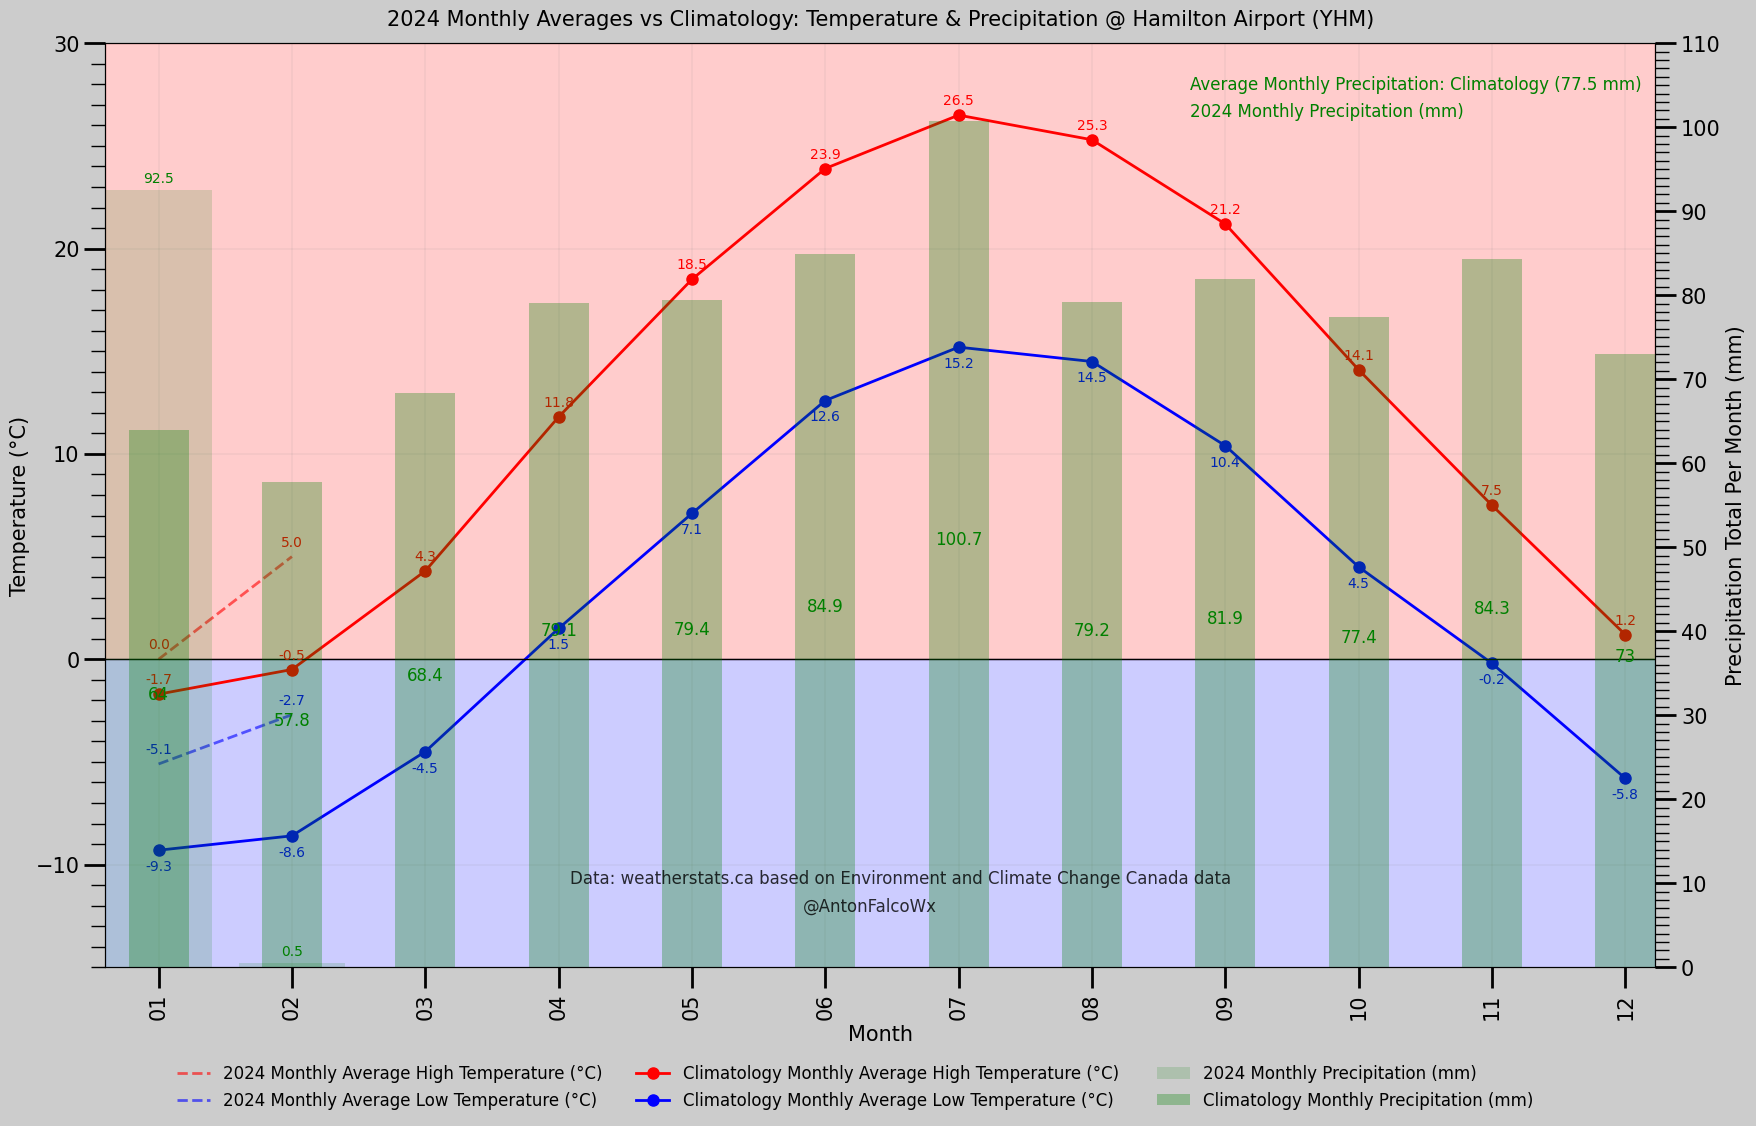

In [22]:
#2024 Monthly Averages vs Climatology Sheet

fig, ax = plt.subplots(figsize=(20,12)) 
ax2 = ax.twinx()
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')

#Line Graph and Annotations (FOR 2024)
Months = (monthly_averages['Month'])
Max = (monthly_averages['max_temperature'])
Min = (monthly_averages['min_temperature'])

#Temperature plots and labels (FOR 2024)
ax.plot(monthly_averages['Month'], monthly_averages['max_temperature'], '--', ms=8, color='red', linewidth=2.0, alpha=0.6)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Months[i], Max[i]+0.5), ha='center', c='red', fontsize=10, fontweight='bold')

ax.plot(monthly_averages['Month'], monthly_averages['min_temperature'], '--', ms=8, color='blue', linewidth=2.0, alpha=0.6)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Months[i], Min[i]+0.5), ha='center', c='blue', fontsize=10, fontweight='bold')

Precip = ax2.bar(monthly_averages['Month'], monthly_averages['precipitation'], alpha=0.15, color='g')
plt.bar_label(Precip, padding=3, fontsize=10, fontweight='bold', color='g')



#Temperature plots and labels (FOR CLIMATOLOGY)
Month = (Climatology['Month'])
Max = (Climatology['Daily Maximum Temperature'])
Min = (Climatology['Daily Minimum Temperature'])
Average = (Climatology['Daily Average Temperature'])

#Monthly Max
ax.plot(Climatology['Month'], Climatology['Daily Maximum Temperature'], '-o', ms=8, color='red', linewidth=2.0)  
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10)

#Monthly Min
ax.plot(Climatology['Month'], Climatology['Daily Minimum Temperature'], '-o', ms=8, color='blue', linewidth=2.0)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]-1), ha='center', c='blue', fontsize=10)

#Precipitation Bar and Label
#ax2.bar(data['Month'], data['Precipitation (mm)'],alpha=0.4, color='g')
Precip = ax2.bar(Climatology['Month'], Climatology['Precipitation'], alpha=0.3, color='g', width=0.45)
plt.bar_label(Precip, padding=3, fontsize=12, color='g',label_type='center')



#Labels
ax.grid(which='major', color='gray', linewidth=0.15, alpha=0.75)
ax.set_title('2024 Monthly Averages vs Climatology: Temperature & Precipitation @ Hamilton Airport (YHM)', y=1.01, fontweight='bold', fontsize=15)
ax.set_xlabel('Month',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)
ax2.set_ylabel('Precipitation Total Per Month (mm)', fontweight='bold', fontsize=15)

#Temperature & Month X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-15, 30])
ax2.set_ylim([0, 110])

ax.legend(["2024 Monthly Average High Temperature (°C)", "2024 Monthly Average Low Temperature (°C)", "Climatology Monthly Average High Temperature (°C)",  "Climatology Monthly Average Low Temperature (°C)"],
          fontsize=12, loc='lower center', bbox_to_anchor=(0.35, -0.17), ncol=2, frameon=False)
ax2.legend(["2024 Monthly Precipitation (mm)", "Climatology Monthly Precipitation (mm)"], loc='lower center', bbox_to_anchor=(0.8, -0.17), ncol=1, fontsize=12, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(10))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
plt.text(0.45, 0.06, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.8)
plt.text(0.30, 0.09, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.8)
plt.text(0.7, 0.95, 'Average Monthly Precipitation: Climatology (77.5 mm)', fontsize = 12, color='green', transform=ax.transAxes)
plt.text(0.7, 0.92, '2024 Monthly Precipitation (mm)', fontsize = 12, color='green', transform=ax.transAxes)


#Average lines (Average Temperature and Average Precip)
ax.axhline(0, 0, 28,color='black',linewidth=1.0,linestyle='solid')
#ax2.axhline(77.5,0,28,color='green',linewidth=2.0,linestyle='dashed',alpha=0.3) #CLIMATOLOGY
#ax2.axhline(82.5,0,28,color='green',linewidth=2.0,linestyle='dashed',alpha=0.4) #2023


#Shaded background (Background Red)
ax.axhspan(30, 0, alpha=0.2, color='r')

#Shaded background (Background Blue)
ax.axhspan(-20, 0, alpha=0.2, color='b')

#plt.savefig('YHM_Normals vs monthly_averages.jpg', dpi=300)
plt.show()
plt.close()

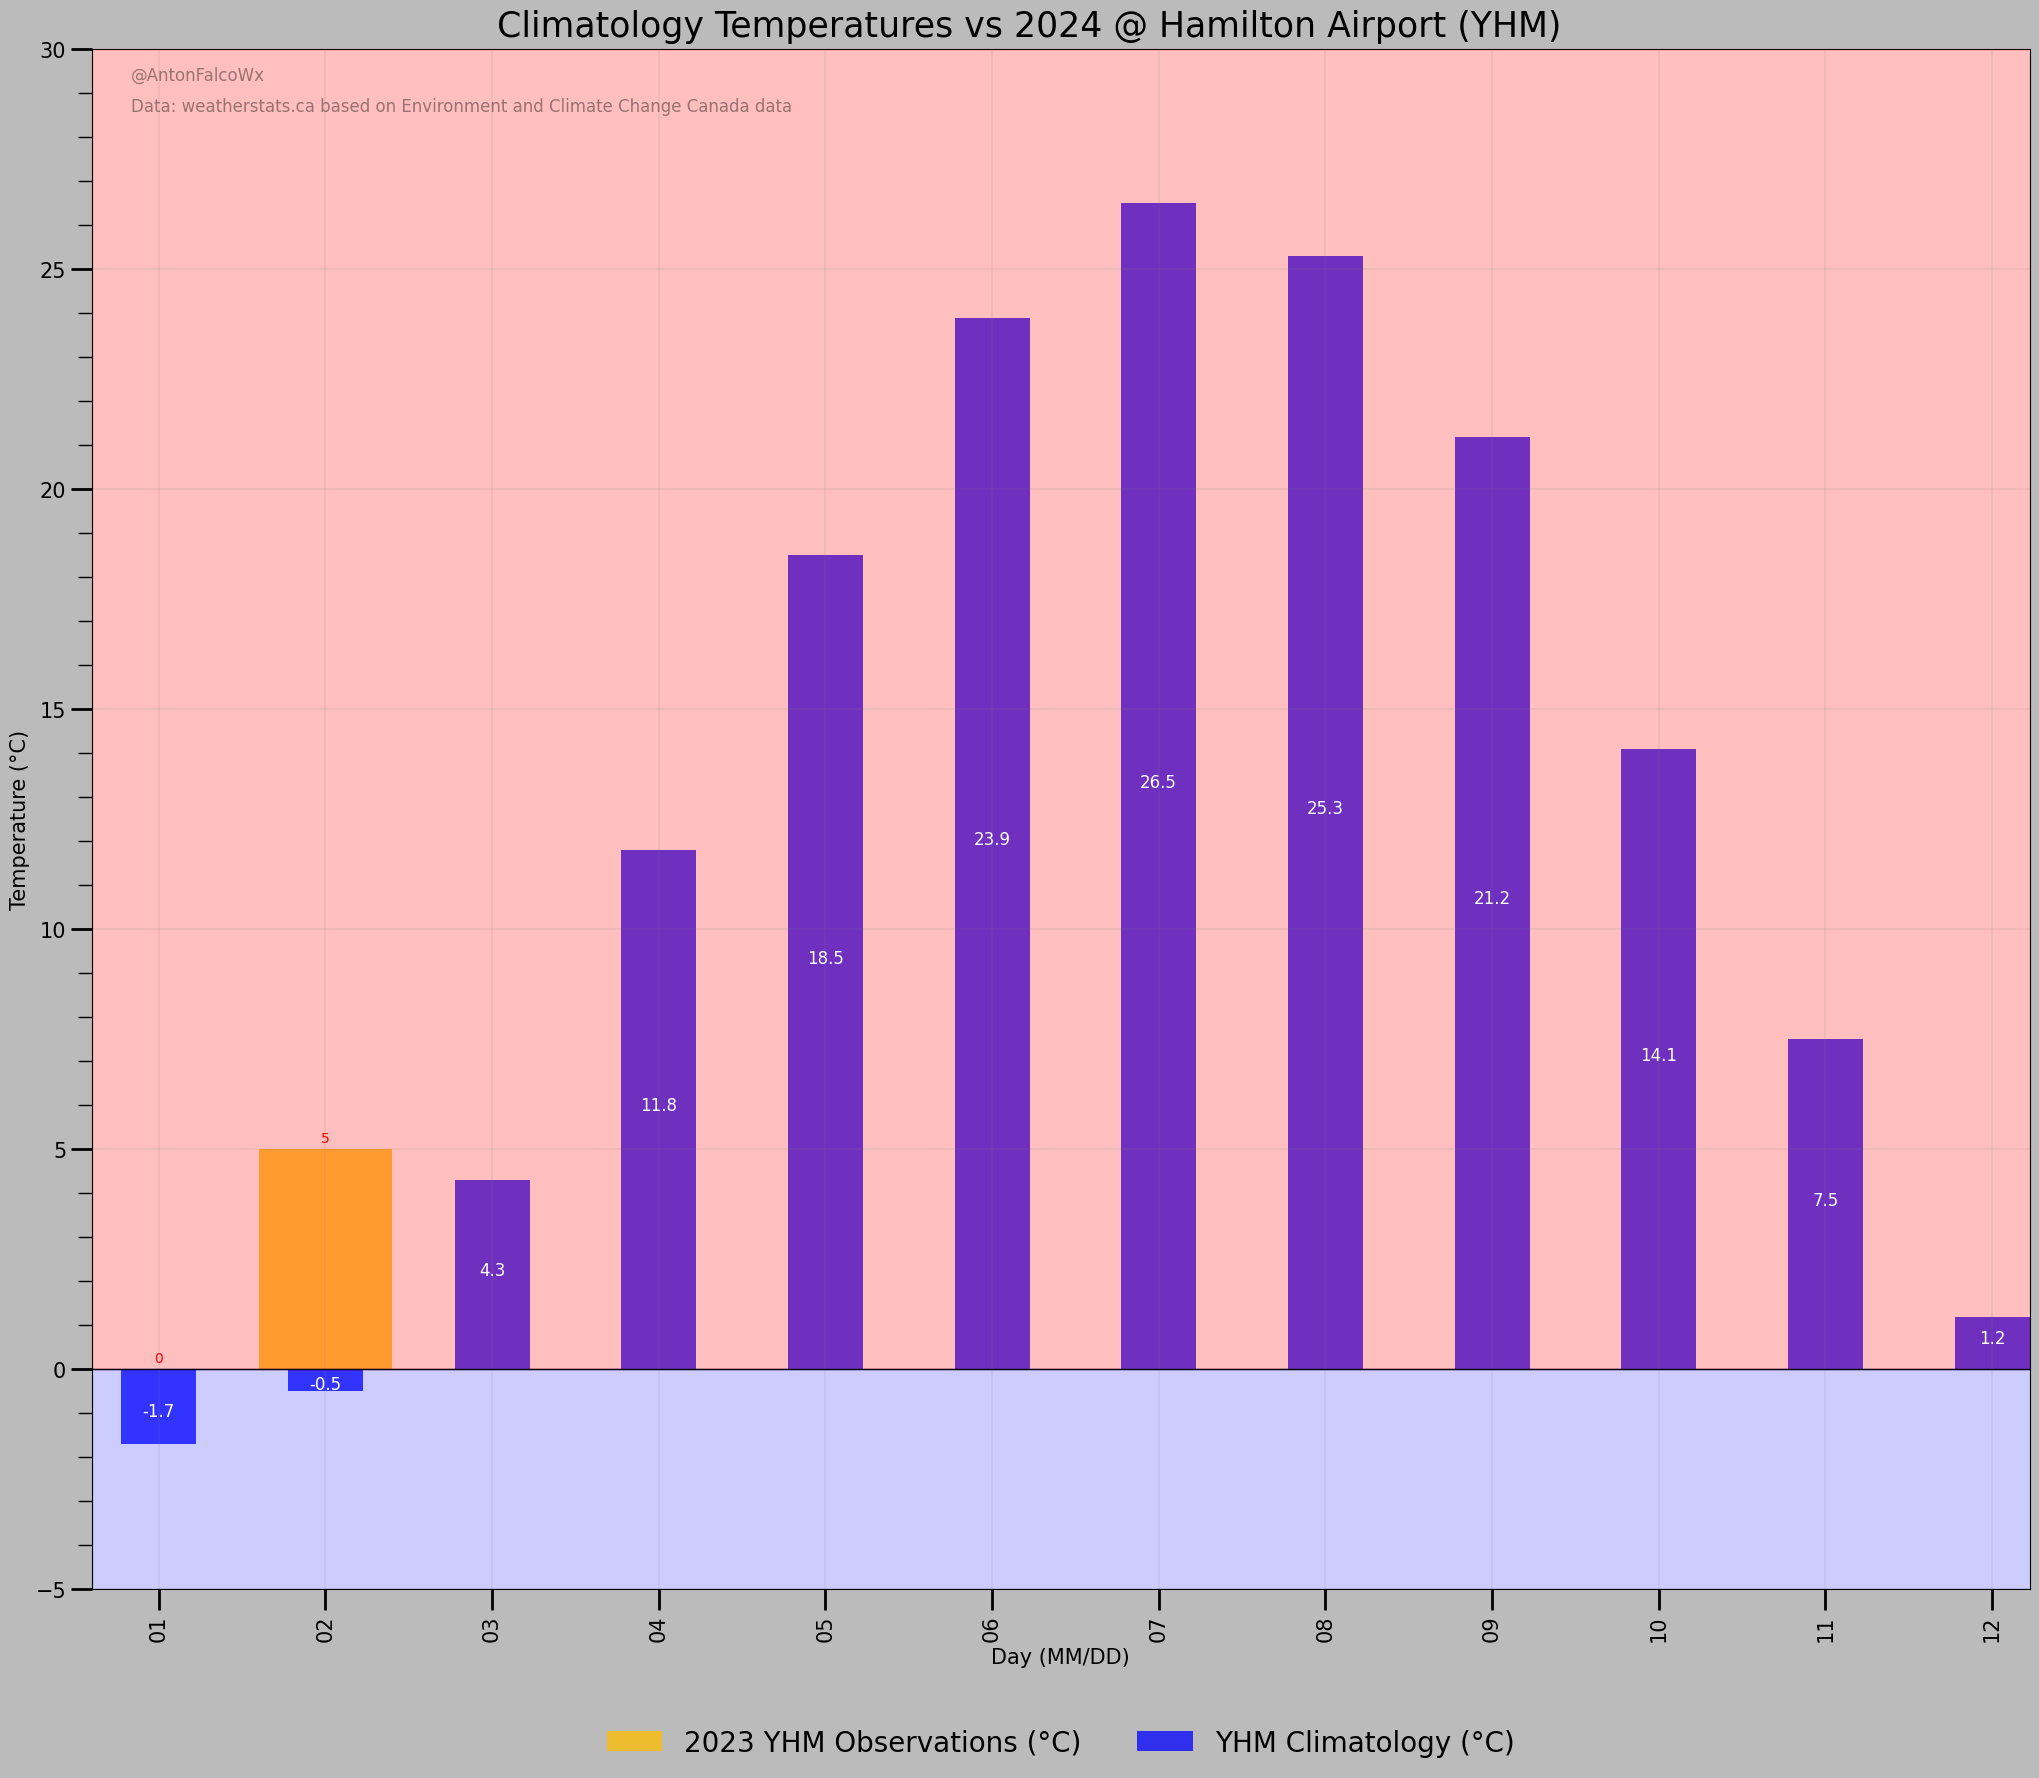

In [23]:
#Overlapping Highs and Lows
fig, ax = plt.subplots(figsize=(25,20))
fig.suptitle('Climatology Temperatures vs 2024 @ Hamilton Airport (YHM)',  y=.9, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Temperature Bar and Label (2023)
Temps_2023 = ax.bar(monthly_averages['Month'], monthly_averages['max_temperature'], alpha=0.75, color='#FFBF00')
plt.bar_label(Temps_2023, padding=3, fontsize=10, fontweight='bold', color='r')

#Temperature Bar and Label (Climatology)
Temps = ax.bar(Climatology['Month'], Climatology['Daily Maximum Temperature'], alpha=0.75, color='b', width=0.45)
plt.bar_label(Temps, padding=3, fontsize=12, color='white', label_type='center')

#Legends 
ax.legend(["2023 YHM Observations (°C)", "YHM Climatology (°C)"], fontsize=20, loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=2, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-5, 30])


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


#Average lines (Average Temperature and Average Precip)
ax.axhline(0,0,28,color='black',linewidth=1.0,linestyle='solid')


#Adding name 
plt.text(0.02, 0.98, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.02, 0.96, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.4)

#Shaded background (red)
ax.axhspan(30, 0, alpha=0.25, color='r')

#Shaded background (blue)
ax.axhspan(-5, 0, alpha=0.2, color='b')


#Date formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM_Normals vs December Bar Graph (Overlap).jpg', dpi=300)
plt.show()
plt.close()

In [24]:
#Un-Comment to use for monthly breakdown
#Yearly = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Yearly.xlsx')
#Yearly = Yearly[(Yearly['date'] >= '2024-01-01') & (Yearly['date'] < '2024-02-01')].reset_index()   
#Yearly.tail(10)

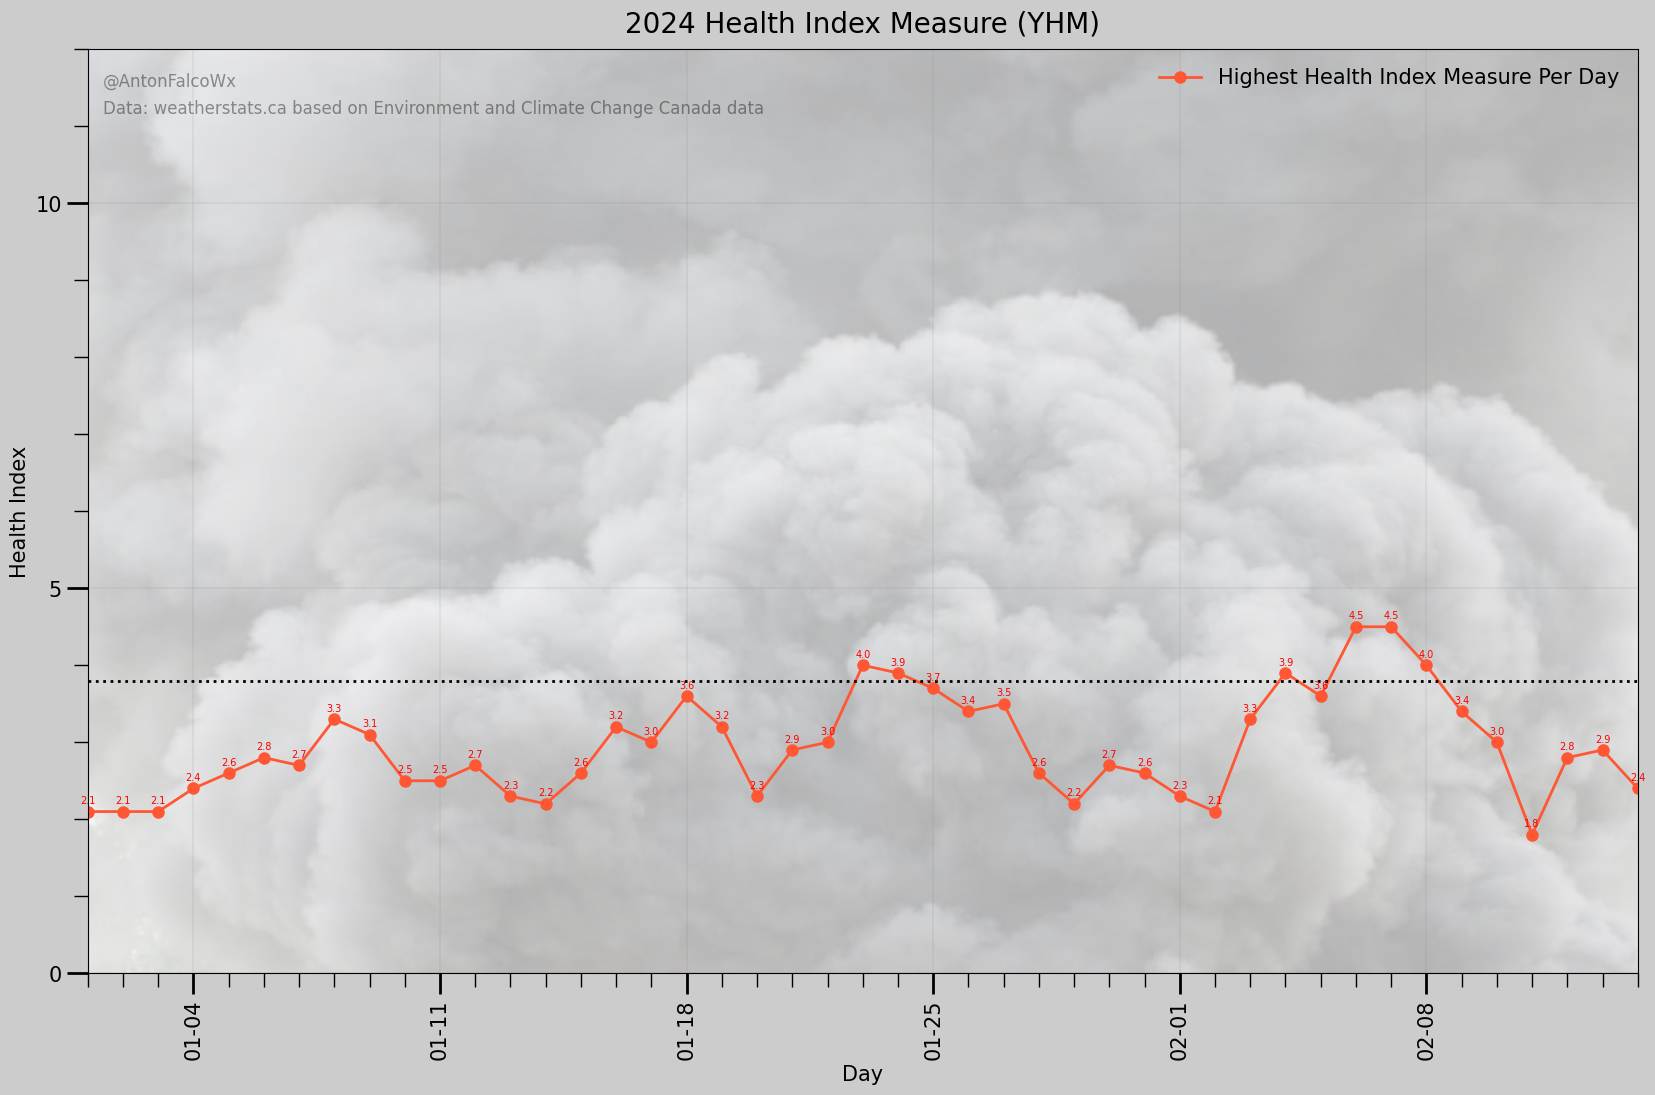

In [25]:
#HEALTH INDEX: LINE

fig, ax = plt.subplots(figsize=(20,12)) 
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')

#Background Image
Day = (Yearly['date'])
health = (Yearly['max_health_index'])

img_extent = [min(Day), max(Day), 0, 12]
img = mpimg.imread(r'C:\Users\Anton\Desktop\Visualization\smoke.jpg')
ax.imshow(img, extent=img_extent, aspect='auto', alpha=0.35)


#Line Graph and Annotations
Date = (Yearly['date'])
Max_Health = (Yearly['max_health_index'])

#Temperature plots and labels
ax.plot(Yearly['date'], Yearly['max_health_index'], '-o', ms=8, color='#FF5733', linewidth=2.0)
for i, txt in enumerate(Max_Health):
    ax.annotate(txt, (Date[i], Max_Health[i]+0.1), ha='center', c='red', fontsize=7) #fontweight='bold'

#Labels
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('2024 Health Index Measure (YHM)', y=1.01, fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=15)
ax.set_ylabel('Health Index',fontweight='bold', fontsize=15)

#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 12])

#Legends 
ax.legend(["Highest Health Index Measure Per Day"],fontsize=15, loc=1, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
plt.text(0.01, 0.96, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.01, 0.93, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.4)
#plt.text(0.2, 0.6, '2024 Daily Health Index Average: April to August (4.2)',color='red', fontsize = 10, transform=ax.transAxes, alpha=0.9)
#plt.text(0.2, 0.58, '2024 Daily Health Index Average: Yearly (3.4)',color='red', fontsize = 10, transform=ax.transAxes, alpha=0.9)
#plt.text(0.58, 0.95, 'Wildfire Smoke (gray)', color='black', fontsize=10, transform=ax.transAxes)

#Average lines (Average Temperature and Average Precip)
ax.axhline(3.79,0,28,color='black', linewidth=2.0, linestyle='dotted')

#Shaded background (Background Red)
#ax.axhspan(12, 0, alpha=0.2, color='r')

#Vertical Shading (smoke)
#start_date = dt.datetime(2024, 6, 5)
#end_date = dt.datetime(2024, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.6, color='gray')
#
#start_date = dt.datetime(2024, 6, 28)
#end_date = dt.datetime(2024, 6, 29)
#ax.axvspan(start_date, end_date, alpha=0.6, color='gray')

#plt.savefig('YHM_Health_Normals', dpi=300)
plt.show()
plt.close()

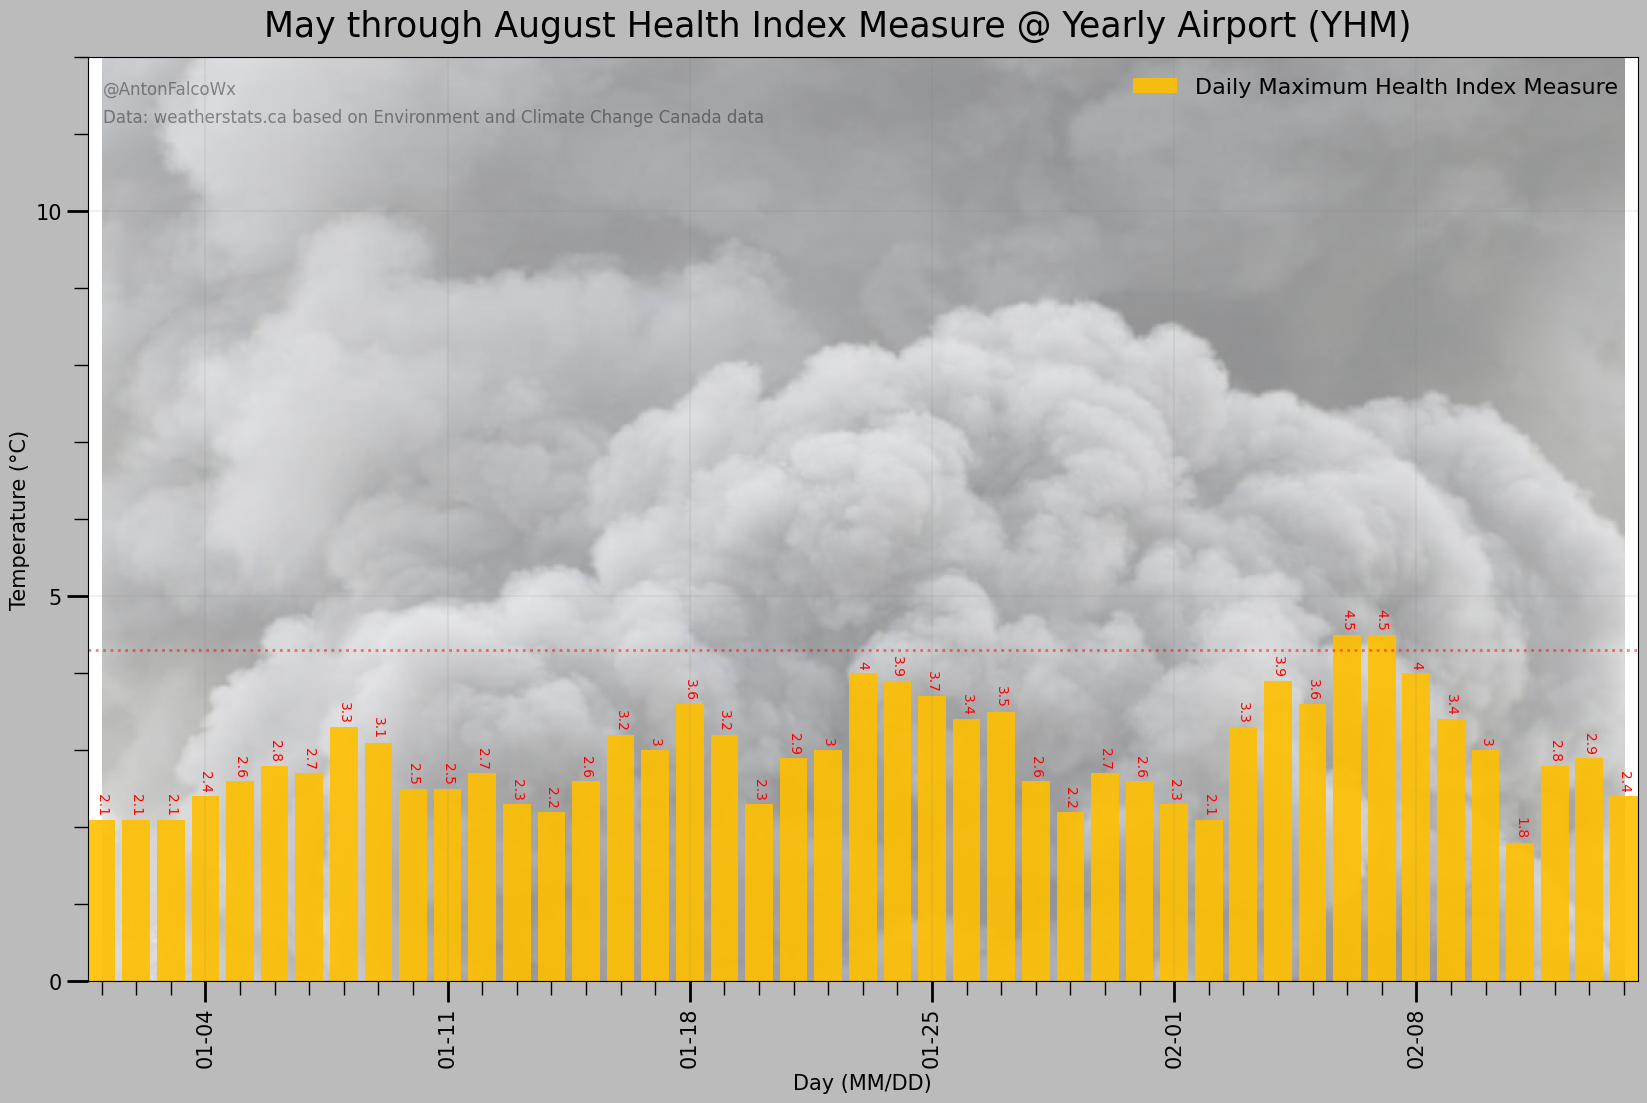

In [26]:
#SPECIFIC TIME FRAME HEALTH INDEX: BAR
fig, ax = plt.subplots(figsize=(20,12))
fig.suptitle('May through August Health Index Measure @ Yearly Airport (YHM)',  y=.92, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Vertical layout
#fig, (ax, ax2) = plt.subplots(2, figsize=(18,15))
#ax.plot(1, 2)
#ax2.plot(1, -2)
#fig.suptitle('June High and Low Temperatures @ Yearly Airport (YHM)', y=.90, fontweight='bold', fontsize=20) #y=.90 adjusts title
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
#fig.patch.set_facecolor('#bbb')


#Background Image
Day = (Yearly['date'])
health = (Yearly['max_health_index'])

x_min = min(Day)
x_max = max(Day)

img_extent = [x_min, x_max, 0, 12]
img = mpimg.imread(r'C:\Users\Anton\Desktop\Visualization\smoke.jpg')
ax.imshow(img, extent=img_extent, aspect='auto', alpha=0.5)



#Bar Plot
Day = (Yearly['date'])
Max_Health = (Yearly['max_health_index'])

rects1 = ax.bar((Yearly['date']), Yearly['max_health_index'], width=0.8, label='Max', color='#FFBF00', alpha=0.9)
plt.bar_label(rects1, padding=3, fontsize=10, color='red', label_type='edge',  rotation=270, fontweight='bold')


#Legends 
ax.legend(["Daily Maximum Health Index Measure"],fontsize=16, loc=1, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 12])

#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
plt.text(0.01, 0.96, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.01, 0.93, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.4)
#plt.text(0.63, 0.90, '2024 Daily Health Index Average: January through August (4.1)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
#plt.text(0.69, 0.87, 'Notable Wildfire Smoke Events: Highlighted Gray', color='black', fontsize=12, transform=ax.transAxes)

#Average lines (Average Health Index)
ax.axhline(4.3,0,28,color='r', linewidth=2.0, linestyle='dotted', alpha=0.5)

#Shaded background (Background Red)
#ax.axhspan(11.5, 0, alpha=0.2, color='r')

#Vertical Shading (smoke)
#start_date = dt.datetime(2024, 6, 5)
#end_date = dt.datetime(2024, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.7, color='gray')
#
#start_date = dt.datetime(2024, 6, 27)
#end_date = dt.datetime(2024, 7, 2)
#ax.axvspan(start_date, end_date, alpha=0.7, color='gray')


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM May through August Smoke.jpg', dpi=300)
plt.show()
plt.close()

In [27]:
#INDIVIDUAL MONTHS (Change dates for monthly breakdowns)
Yearly = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Yearly.xlsx')
Yearly = Yearly[(Yearly['date'] >= '2024-01-01') & (Yearly['date'] < '2024-02-01')].reset_index() 
#Yearly = Yearly[(Yearly['date'] >= '2024-02-01') & (Yearly['date'] < '2024-02-15')].reset_index()     
Yearly.tail(10)

#Normals found here: https://hamilton.weatherstats.ca/download.html (LOOK FOR 30 YEAR NORMALS AND DOWNLOAD MONTHLY)
Normals = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Normals.xlsx')
Normals = Normals[(Normals['date'] >= '2024-01-01') & (Normals['date'] < '2024-02-01')].reset_index()  
#Normals = Normals[(Normals['date'] >= '2024-02-01') & (Normals['date'] < '2024-02-15')].reset_index()  
#Normals.head(10)

#Extremes found here: https://hamilton.weatherstats.ca/download.html (LOOK FOR 30 YEAR NORMALS AND DOWNLOAD MONTHLY)
Extremes = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Daily_Extremes.xlsx')
Extremes = Extremes[(Extremes['date'] >= '2024-01-01') & (Extremes['date'] < '2024-02-01')].reset_index() 
#Extremes = Extremes[(Extremes['date'] >= '2024-02-01') & (Extremes['date'] < '2024-02-15')].reset_index() 
#Extremes.head(10)

In [28]:
#MONTHLY AVERAGE HIGH TEMPERATURE
Average_High = Yearly['max_temperature'].mean().round(2)
print(f"Monthly Average High Temperature = {Average_High}°C")

#MONTHLY AVERAGE LOW TEMPERATURE
Average_Low = Yearly['min_temperature'].mean().round(2)
print(f"Monthly Average Low Temperature = {Average_Low}°C")

#HIGHEST MAX TEMP
Highest_Temp = Yearly['max_temperature'].max()
Date_Highest_Temp = Yearly.loc[Yearly['max_temperature'].idxmax(), 'date'].date()
print(f"Highest High Temperature = {Highest_Temp}°C on {Date_Highest_Temp}")

#LOWEST HIGH
Lowest_High = Yearly['max_temperature'].min()
Date_Lowest_High = Yearly.loc[Yearly['max_temperature'].idxmin(), 'date'].date()
print(f"Lowest High Temperature = {Lowest_High}°C on {Date_Lowest_High}")

#LOWEST LOW TEMP
Low_Low = Yearly['min_temperature'].min()
Date_Low_Low = Yearly.loc[Yearly['min_temperature'].idxmin(), 'date'].date()
print(f"Lowest Low Temperature = {Low_Low}°C on {Date_Low_Low}")

#HIGHEST SUSTAINED WIND
Highest_Sustained_Wind = Yearly['max_wind_speed'].max()
Date_Highest_Wind = Yearly.loc[Yearly['max_wind_speed'].idxmax(), 'date'].date()
print(f"Highest Sustained Wind Speed = {Highest_Sustained_Wind} km/h on {Date_Highest_Wind}")

#HIGHEST WIND GUST
Highest_Wind_Gust = Yearly['max_wind_gust'].max()
Date_Highest_Gust = Yearly.loc[Yearly['max_wind_gust'].idxmax(), 'date'].date()
print(f"Highest Recorded Wind Gust = {Highest_Wind_Gust:.0f} km/h on {Date_Highest_Wind}")

#HIGHEST BAROMETRIC PRESSURE
Highest_Pressure = Yearly['max_pressure_sea'].max() *10
Date_Highest_Pressure = Yearly.loc[Yearly['max_pressure_sea'].idxmax(), 'date'].date()
print(f"Highest Barometric Pressure = {Highest_Pressure:.1f} mbar on {Date_Highest_Pressure}")

#LOWEST BAROMETRIC PRESSURE
Lowest_Pressure = Yearly['min_pressure_sea'].min() *10
Date_Lowest_Pressure = Yearly.loc[Yearly['min_pressure_sea'].idxmin(), 'date'].date()
print(f"Lowest Barometric Pressure = {Lowest_Pressure:.1f} mbar on {Date_Lowest_Pressure}")

#TOTAL Yearly PRECIP
Total = Yearly['precipitation'].sum()
print(f"Total Precipitation = {Total:.1f} mm")

#TOTAL Yearly RAIN
Total_Rain = Yearly['rain'].sum()
print(f"Total Yearly Rain = {Total_Rain:.1f} mm")

#TOTAL Yearly SNOW
Total_Snow = Yearly['snow'].sum()
print(f"Total Yearly Snow = {Total_Snow:.1f} cm")

#HIGHEST DAY PRECIPITATION TOTAL
Highest_Precip = Yearly['precipitation'].max() 
Date_Highest_Precipitation = Yearly.loc[Yearly['precipitation'].idxmax(), 'date'].date()
print(f"Highest Precipitation Day & Total = {Highest_Precip} mm on {Date_Highest_Precipitation}")

#HIGHEST DAY RAIN TOTAL
Highest_Rain = Yearly['rain'].max()
Highest_Rain_Day = Yearly.loc[Yearly['rain'].idxmax(), 'date'].date()
print(f"Highest Rainfall Day & Total = {Highest_Rain} mm on {Highest_Rain_Day}")

#HIGHEST DAY SNOW TOTAL
Highest_Snow = Yearly['snow'].max()
Highest_Snow_Day = Yearly.loc[Yearly['snow'].idxmax(), 'date'].date()
print(f"Highest Snowfall Day & Total = {Highest_Snow} cm  on {Highest_Snow_Day}")

#For Highest Health Index Monthly
Highest_Health = Yearly['max_health_index'].max()
Date_Highest_Health = Yearly.loc[Yearly['max_health_index'].idxmax(), 'date'].date()
print(f"Monthly Highest Health Index = {Highest_Health:.1f} on {Date_Highest_Health}")

Monthly Average High Temperature = 0.01°C
Monthly Average Low Temperature = -5.08°C
Highest High Temperature = 6.5°C on 2024-01-09
Lowest High Temperature = -9.0°C on 2024-01-15
Lowest Low Temperature = -17.1°C on 2024-01-20
Highest Sustained Wind Speed = 58 km/h on 2024-01-13
Highest Recorded Wind Gust = 87 km/h on 2024-01-13
Highest Barometric Pressure = 1034.9 mbar on 2024-01-21
Lowest Barometric Pressure = 979.1 mbar on 2024-01-09
Total Precipitation = 92.5 mm
Total Yearly Rain = 71.3 mm
Total Yearly Snow = 21.6 cm
Highest Precipitation Day & Total = 29.9 mm on 2024-01-09
Highest Rainfall Day & Total = 26.9 mm on 2024-01-09
Highest Snowfall Day & Total = 6.8 cm  on 2024-01-23
Monthly Highest Health Index = 4.0 on 2024-01-23


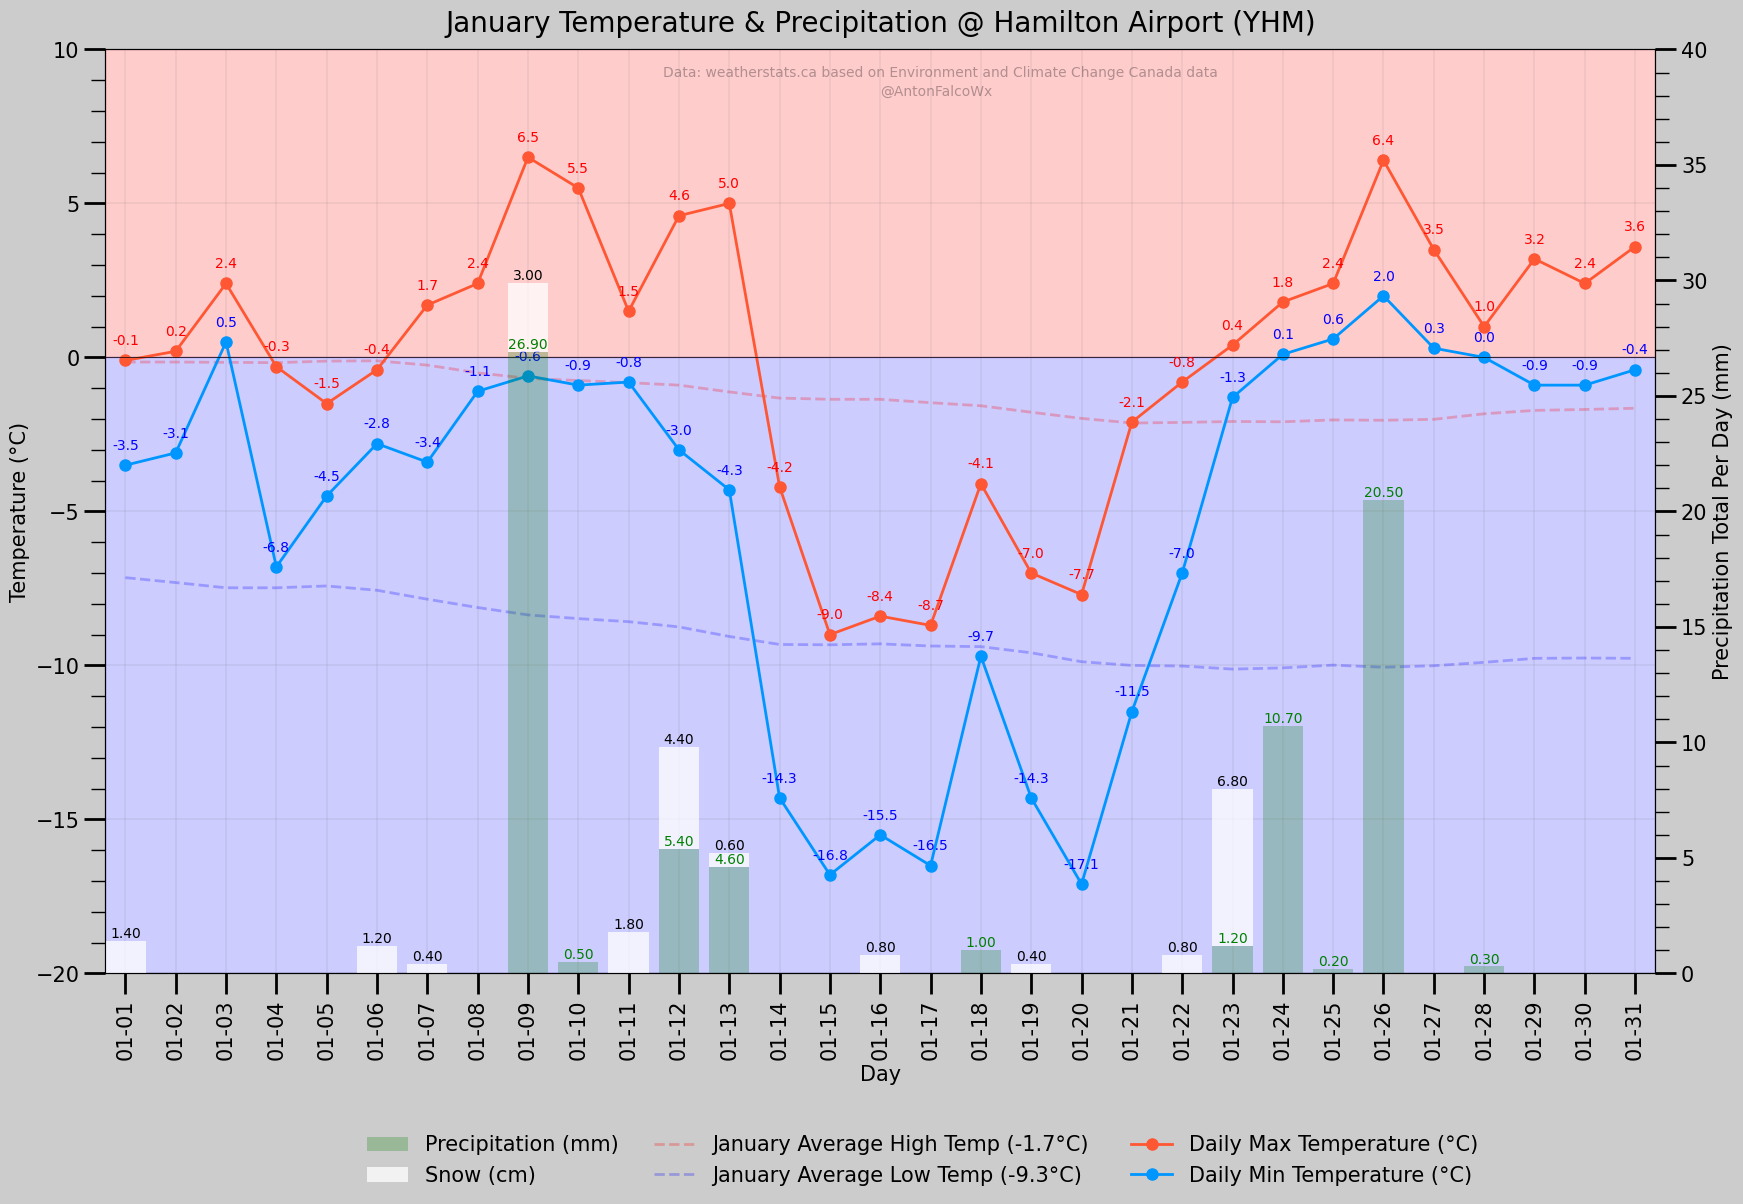

In [29]:
#Yearly PLOT
fig, ax = plt.subplots(figsize=(20,12)) 
ax2 = ax.twinx()
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Line Graph and Annotations
Month = Yearly['date']
Max = Yearly['max_temperature']
Min = Yearly['min_temperature']


# Precipitation Bar
Precipitation = ax2.bar(Month, Yearly['rain'], alpha=0.25, color='g', label='Rainfall')
#plt.bar_label(Precip, padding=3, fontsize=12, label_type='center', color='g')

precip_labels = [f'{precip:.2f}' if precip > 0 else '' for precip in Yearly['rain']]
plt.bar_label(Precipitation, labels=precip_labels, label_type='edge', fontweight='bold', color='green', fontsize=10)


# Snowfall Bar (Stacked on top of Precip)
Snowfall = ax2.bar(Month, Yearly['snow'], bottom=Yearly['rain'], alpha=0.75, color='white', label='Snowfall')  #width=0.5,
#plt.bar_label(Snowfall, padding=3, fontsize=12, label_type='edge', fontweight='bold', color='white')

snow_labels = [f'{snow:.2f}' if snow > 0 else '' for snow in Yearly['snow']]
plt.bar_label(Snowfall, labels=snow_labels, label_type='edge', fontweight='bold', color='black', fontsize=10)


#Precipitation Bar Graphs (Original, Non-Stacked)
#Precip = ax2.bar(Yearly['date'], Yearly['precipitation'], alpha=0.4, color='g')
#plt.bar_label(Precip, padding=3, fontsize=10, fontweight='bold', color='g')
#
#Snowfall = ax2.bar(Yearly['date'], Yearly['snow'], width=0.5, alpha=0.7, color='w')
#plt.bar_label(Snowfall, padding=3, fontsize=10, label_type='center', fontweight='bold', color='black')



#Yearly Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='red', linewidth=2.0, alpha=0.25)
ax.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=2.0, alpha=0.25)

#Temperature plots and labels
ax.plot(Yearly['date'], Yearly['max_temperature'], '-o', ms=8, color='#FF5733', linewidth=2.0)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10, fontweight='bold')

ax.plot(Yearly['date'], Yearly['min_temperature'], '-o', ms=8, color='#0096FF', linewidth=2.0)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]+0.5), ha='center', c='blue', fontsize=10, fontweight='bold')



#Labels
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('January Temperature & Precipitation @ Hamilton Airport (YHM)', y=1.01, fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)
ax2.set_ylabel('Precipitation Total Per Day (mm)', fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-20, 10])
ax2.set_ylim([0, 40])

#Shaded background (Background Red)
ax.axhspan(10, 0, alpha=0.2, color='r')
ax.axhspan(0, -20, alpha=0.2, color='b')

#Vertical Shading (smoke)
#start_date = dt.datetime(2023, 7, 14)
#end_date = dt.datetime(2023, 7, 18)
#ax.axvspan(start_date, end_date, alpha=0.35, color='gray')


#Legends 
ax.legend(["January Average High Temp (-1.7°C)", "January Average Low Temp (-9.3°C)", "Daily Max Temperature (°C)", "Daily Min Temperature (°C)"],fontsize=15, 
          loc='lower center', bbox_to_anchor=(0.62, -0.25), ncol=2, frameon=False)
ax2.legend(["Precipitation (mm)", "Snow (cm)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.25, -0.25), ncol=1)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#Adding name and two line labels
plt.text(0.5, 0.95, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(0.36, 0.97, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 10, transform=ax.transAxes, alpha=0.3)
#plt.text(0.45, 0.7, 'January Average High Temp (-1.7°C)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
#plt.text(0.01, 0.35, 'January Average Low Temp (-9.3°C)',color='blue', fontsize = 12, transform=ax.transAxes, alpha=0.9)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid')

#plt.savefig('YHM_Normals vs January.jpg', dpi=300)
plt.show()
plt.close()

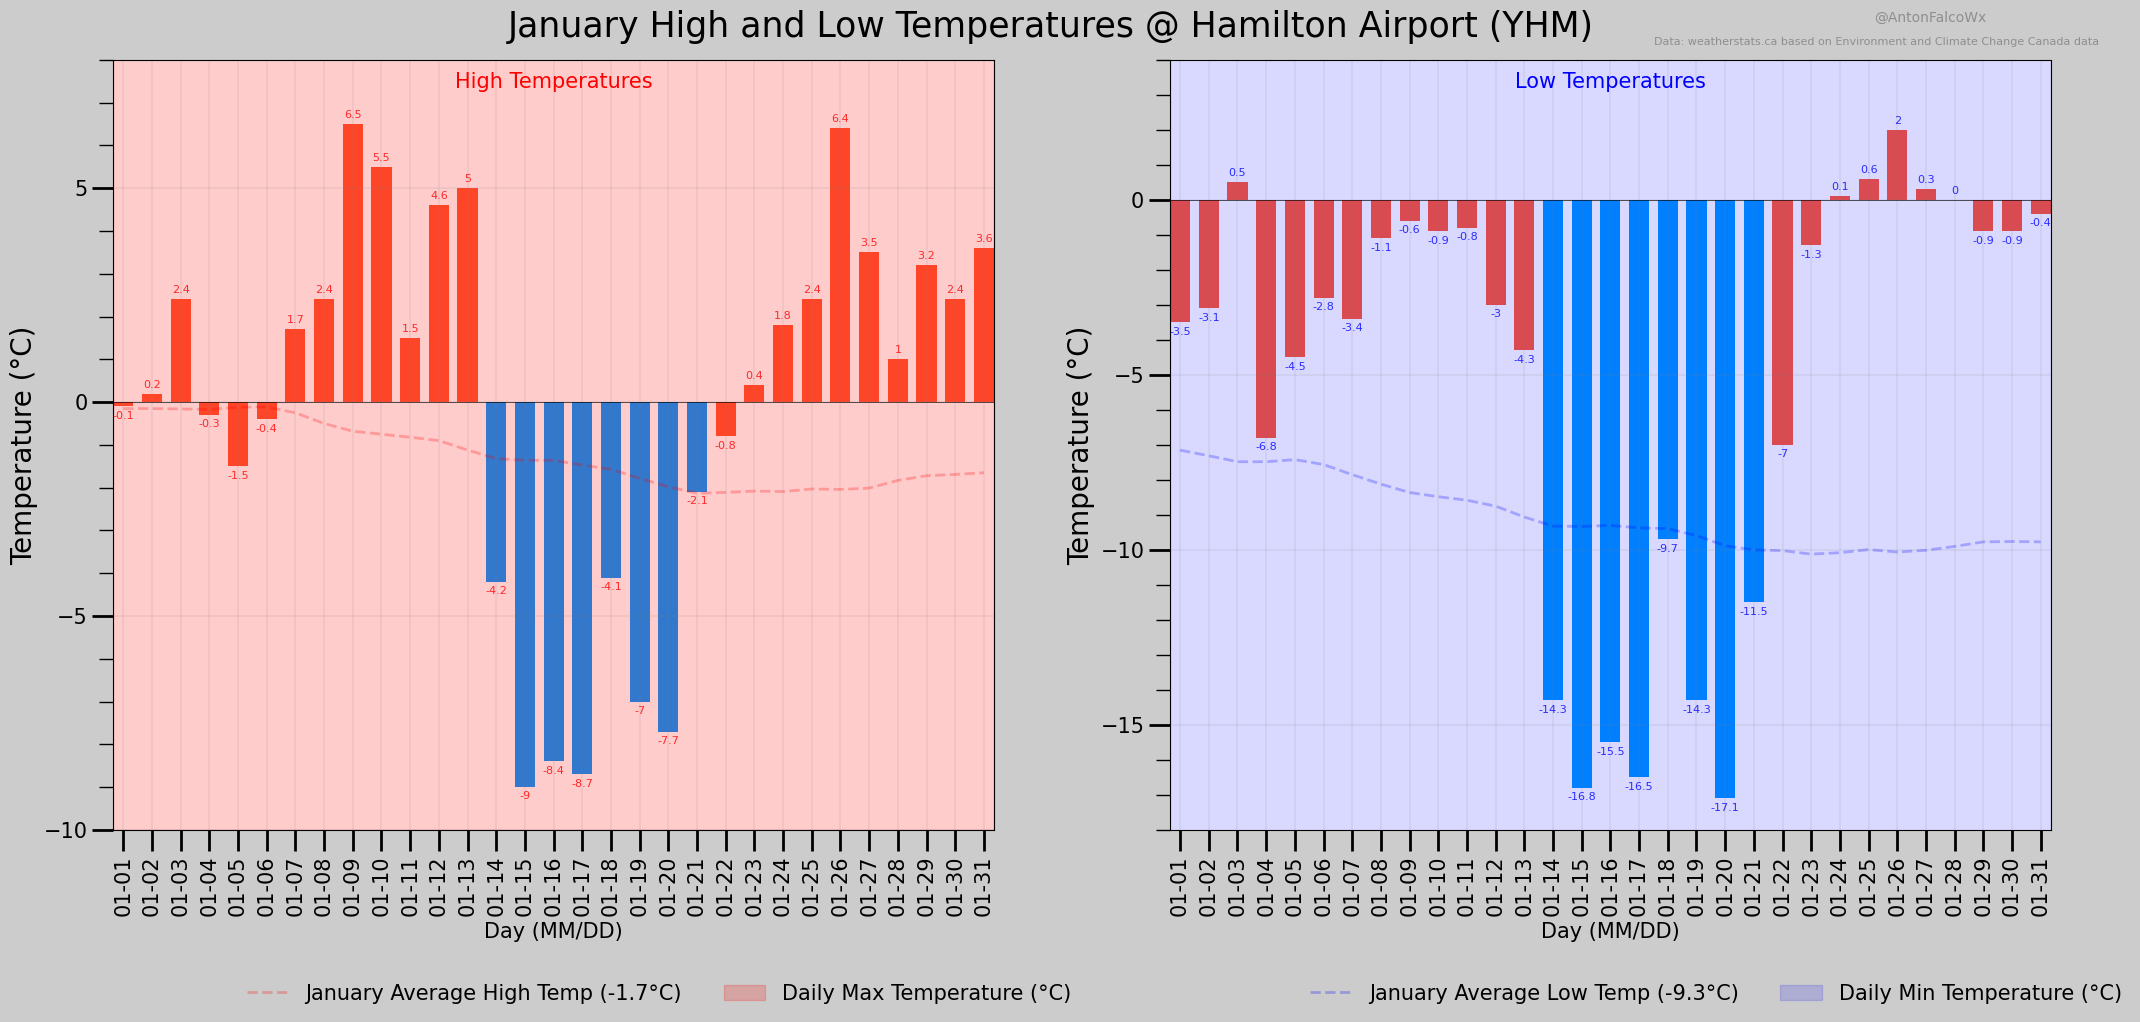

In [30]:
#Separated Highs and Lows
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle('January High and Low Temperatures @ Hamilton Airport (YHM)',  y=.93, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Bar Plots
Max_Temp = Yearly['max_temperature']
Min_Temp = Yearly['min_temperature']

#Left Plot: Data and below average color change
colormap = np.where(Yearly['max_temperature']< -1.7, '#0096FF','#FF5733')
Precip = ax.bar(height=Yearly['max_temperature'], x=Yearly['date'], width=0.7, color=colormap)
ax.bar_label(Precip, padding=3, fontsize=8, fontweight='bold', color='red', alpha=0.8)

#Right Plot: Data and below average color change
colormap=np.where(Yearly['min_temperature']> -9.3, '#FF5733','#0096FF')
Precip2 = ax2.bar(height=Yearly['min_temperature'], x=Yearly['date'], width=0.7, color=colormap)
ax2.bar_label(Precip2, padding=3, fontsize=8, fontweight='bold', color='blue', alpha=0.8)

#Yearly Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='r', linewidth=2.0, alpha=0.25)
ax2.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=2.0, alpha=0.25)


#Labels (left plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('High Temperatures',fontweight='bold', fontsize=15, color='red', y=1.0, pad=-20)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)


#Labels (right plot)
ax2.grid(which='major', color='gray', linewidth=0.15)
ax2.set_title('Low Temperatures', fontweight='bold', fontsize=15, color='blue', y=1.0, pad=-20)
ax2.set_xlabel('Day (MM/DD)', fontweight='bold', fontsize=15)
ax2.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=20)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-10, 8])

ax2.margins(x=0)
ax2.margins(y=0)
ax2.set_ylim([-18, 4])

#Shaded background
ax.axhspan(-10, 10, alpha=0.2, color='r')
ax2.axhspan(5, -20, alpha=0.15, color='b')


#Legends 
ax.legend(["January Average High Temp (-1.7°C)", "Daily Max Temperature (°C)"], fontsize=15, loc='lower center', bbox_to_anchor=(0.62, -0.25), ncol=2, frameon=False)
ax2.legend([ "January Average Low Temp (-9.3°C)", "Daily Min Temperature (°C)"], fontsize=15,loc='lower center', bbox_to_anchor=(0.62, -0.25), ncol=2, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))

ax2.xaxis.set_minor_locator(MultipleLocator())
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params(axis='x', rotation=90)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax2.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)

#Zero degree lines
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid',alpha=0.9)
ax2.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid',alpha=0.9)

#Adding name 
plt.text(2.0, 1.05, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(1.75, 1.02, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 8, transform=ax.transAxes, alpha=0.3)

#plt.text(0.6, 0.8, 'January Average High Temp (-1.7°C)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
#plt.text(1.8, 0.5, 'January Average Low Temp (-9.3°C)',color='blue', fontsize = 12, transform=ax.transAxes, alpha=0.9)


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)

#plt.savefig('YHM_Normals vs January Bar Graph (double).jpg', dpi=300)
plt.show()
plt.close()

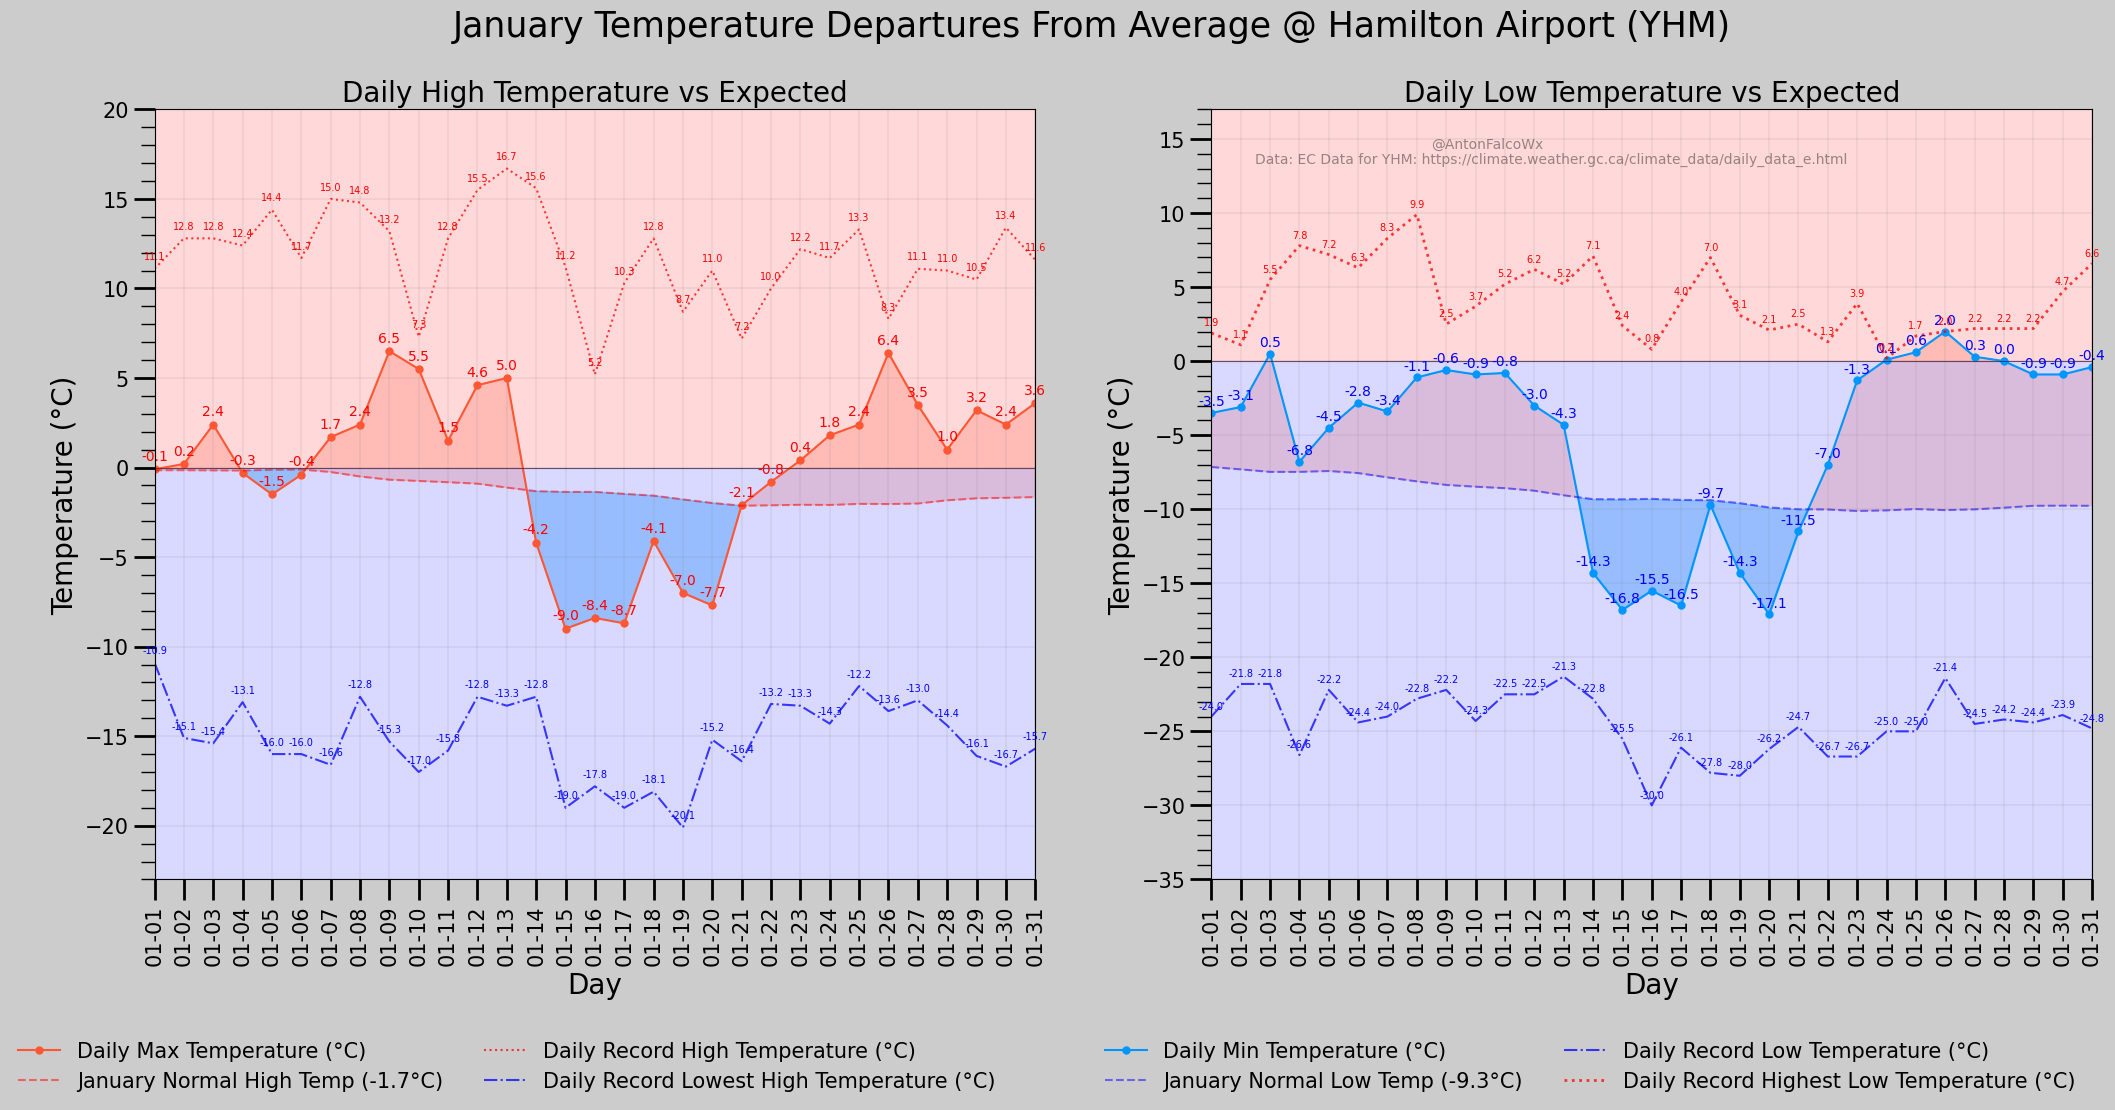

In [31]:
#Fill Differences From Average
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle('January Temperature Departures From Average @ Hamilton Airport (YHM)', fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Observations
Month = Yearly['date']
Max = Yearly['max_temperature']
Min = Yearly['min_temperature']

#Normals
Date = Normals['date']
High_Normals = Normals['max_temperature_v']
Low_Normals = Normals['min_temperature_v']

#Extremes
Extreme_Date = Extremes['date']
Highest_High = Extremes['max_temperature_v']
Lowest_High = Extremes['min_max_temperature_v']
Lowest_Low = Extremes['min_temperature_v']
Highest_Low = Extremes['max_min_temperature_v']


#Left axis: Normals, Observed & Extreme
ax.plot(Yearly['date'], Yearly['max_temperature'], '-o', ms=5, color='#FF5733', linewidth=1.5)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i] + 0.5), ha='center', c='red', fontsize=10)

#Yearly High Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='red', linewidth=1.5, alpha=0.5)

#High Extremes: Highest High & Lowest High 
ax.plot(Extremes['date'], Extremes['max_temperature_v'], ':', ms=5, color='red', linewidth=1.5, alpha=0.75)
for i, txt in enumerate(Highest_High):
    ax.annotate(txt, (Extreme_Date[i], Highest_High[i] + 0.5), ha='center', c='red', fontsize=7)
    
ax.plot(Extremes['date'], Extremes['min_max_temperature_v'], '-.', ms=5, color='blue', linewidth=1.5, alpha=0.75)
for i, txt in enumerate(Lowest_High):
    ax.annotate(txt, (Extreme_Date[i], Lowest_High[i] + 0.5), ha='center', c='blue', fontsize=7)



#Right axis: Normals, Observed & Extreme
ax2.plot(Yearly['date'], Yearly['min_temperature'], '-o', ms=5, color='#0096FF', linewidth=1.5)
for i, txt in enumerate(Min):
    ax2.annotate(txt, (Month[i], Min[i] + 0.5), ha='center', c='blue', fontsize=10)
    
#Yearly Low Normals plots and labels
ax2.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=1.5, alpha=0.5) 

#Low Extremes: Lowest High & Lowest Low 
ax2.plot(Extremes['date'], Extremes['min_temperature_v'], '-.', ms=5, color='blue', linewidth=1.5, alpha=0.75)
for i, txt in enumerate(Lowest_Low):
    ax2.annotate(txt, (Extreme_Date[i], Lowest_Low[i] + 0.5), ha='center', c='blue', fontsize=7)

ax2.plot(Extremes['date'], Extremes['max_min_temperature_v'], ':', ms=5, color='red', linewidth=2.0, alpha=0.75)
for i, txt in enumerate(Highest_Low):
    ax2.annotate(txt, (Extreme_Date[i], Highest_Low[i] + 0.5), ha='center', c='red', fontsize=7)



#Labels
#left plot
ax.set_title('Daily High Temperature vs Expected',fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=20)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)
ax.grid(which='major', color='gray', linewidth=0.15)


#right plot
ax2.set_title('Daily Low Temperature vs Expected',fontweight='bold', fontsize=20)
ax2.set_xlabel('Day',fontweight='bold', fontsize=20)
ax2.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)
ax2.grid(which='major', color='gray', linewidth=0.15)


#Legends (normals)
#ax.legend(["Daily Max Temperature (°C)", "January Daily Average High Temp (-1.7°C)"],fontsize=15, loc='lower center', bbox_to_anchor=(0.4, -0.25), ncol=2, frameon=False)
#ax2.legend(["Daily Min Temperature (°C)", "January Daily Average Low Temp (-9.3°C)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.43, -0.25), ncol=2)

#Legends (extremes)
ax.legend(["Daily Max Temperature (°C)", "January Normal High Temp (-1.7°C)", "Daily Record High Temperature (°C)", "Daily Record Lowest High Temperature (°C)"],fontsize=15, loc='lower center', 
          bbox_to_anchor=(0.4, -0.3), ncol=2, frameon=False)

ax2.legend(["Daily Min Temperature (°C)", "January Normal Low Temp (-9.3°C)", "Daily Record Low Temperature (°C)", "Daily Record Highest Low Temperature (°C)"], fontsize=15, frameon=False, loc='lower center',
           bbox_to_anchor=(0.43, -0.3), ncol=2)


#Fill-Ins for Above Average and Below Average Highs/Lows
#Fill (Highs)
ax.fill_between(Yearly['date'], High_Normals, Yearly['max_temperature'], where=Yearly['max_temperature']>= High_Normals, interpolate=True, color='#FF5733', alpha=0.2)
ax.fill_between(Yearly['date'], High_Normals, Yearly['max_temperature'], where=Yearly['max_temperature']<= High_Normals, interpolate=True, color='#0096FF', alpha=0.3)

#Fill (Lows)
ax2.fill_between(Yearly['date'], Low_Normals , Yearly['min_temperature'], where=Yearly['min_temperature']>= Low_Normals, interpolate=True, color='#FF5733', alpha=0.2)
ax2.fill_between(Yearly['date'], Low_Normals , Yearly['min_temperature'], where=Yearly['min_temperature']<= Low_Normals, interpolate=True, color='#0096FF', alpha=0.3)



#Parameters
ax.margins(x=0)
ax.margins(y=0)
ax2.margins(x=0)
ax2.margins(y=0)

#Normals Limits
#ax.set_ylim(-10, 8)
#ax2.set_ylim(-19, 4)

#Extreme Limits
ax.set_ylim(-23, 20)
ax2.set_ylim(-35, 17)


#Shaded background normals
#ax.axhspan(8, 0, alpha=0.15, color='r')
#ax.axhspan(0, -12, alpha=0.15, color='b')
#ax2.axhspan(5, 0, alpha=0.15, color='r')
#ax2.axhspan(0, -20, alpha=0.15, color='b')

#Shaded background extremes
ax.axhspan(20, 0, alpha=0.15, color='r')
ax.axhspan(0, -23, alpha=0.15, color='b')
ax2.axhspan(17, 0, alpha=0.15, color='r')
ax2.axhspan(0, -35, alpha=0.15, color='b')


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
#ax2.yaxis.set_minor_locator(MultipleLocator())
#ax2.yaxis.set_major_locator(MultipleLocator(5))

#Right axis intervals (ticks)
ax2.xaxis.set_minor_locator(MultipleLocator())
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))

#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)


#Adding name and two line labels
plt.text(1.45, 0.95, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.4)
plt.text(1.25, 0.93, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 10, transform=ax.transAxes, alpha=0.4)
#plt.text(0.02, 0.37, 'January Average High Temp (-1.7°C)',color='red', fontsize = 14, transform=ax.transAxes, alpha=0.9)
#plt.text(1.25, 0.33, 'January Average Low Temp (-9.3°C)',color='blue', fontsize = 14, transform=ax.transAxes, alpha=0.9)
#plt.text(0.3, 0.12, 'January Average Precip Per Day (1981-2010)',color='green', fontsize = 14, transform=ax.transAxes, alpha=0.9)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax2.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid', alpha=0.7)
ax2.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid', alpha=0.7)


#plt.savefig('YHM_Normals vs January (double).jpg', dpi=300)
plt.show()
plt.close()

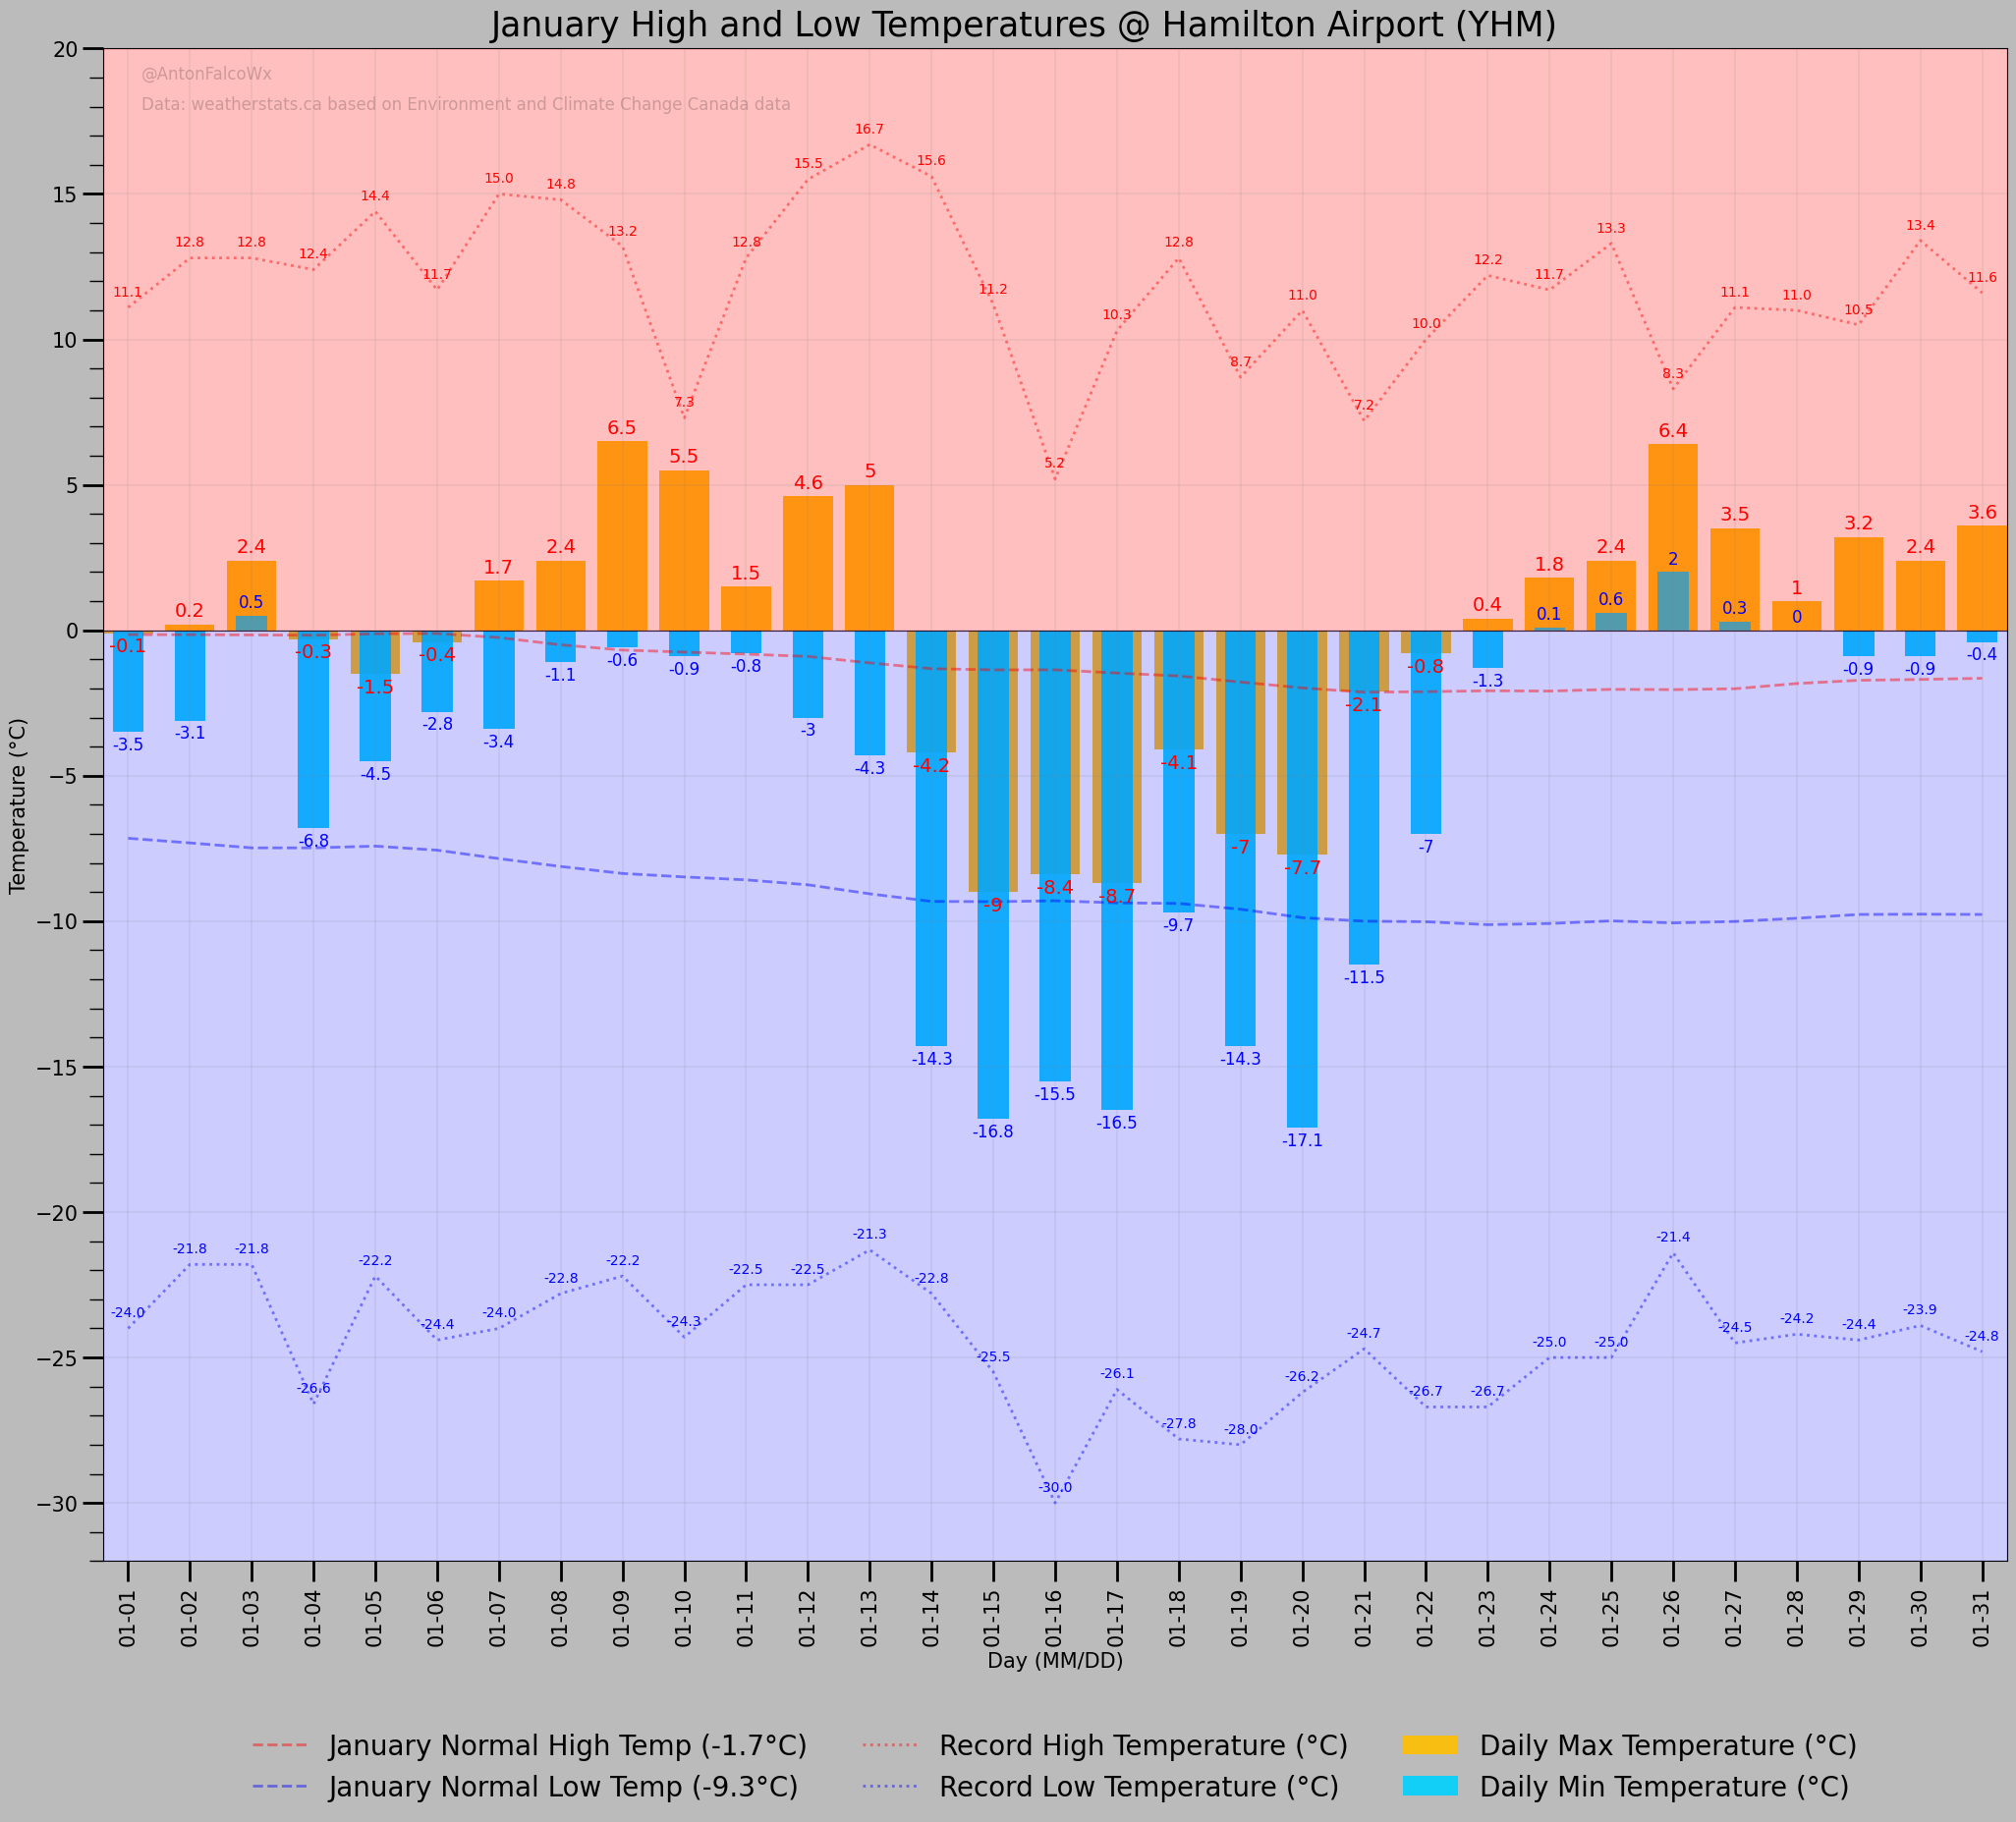

In [33]:
#Overlapping Highs and Lows
fig, ax = plt.subplots(figsize=(25,20))
fig.suptitle('January High and Low Temperatures @ Hamilton Airport (YHM)',  y=.9, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Vertical layout
#fig, (ax, ax2) = plt.subplots(2, figsize=(18,15))
#ax.plot(1, 2)
#ax2.plot(1, -2)
#fig.suptitle('January High and Low Temperatures @ Hamilton Airport (YHM)', y=.90, fontweight='bold', fontsize=20) #y=.90 adjusts title
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
#fig.patch.set_facecolor('#bbb')


#Extremes
Extreme_Date = Extremes['date']
Highest_High = Extremes['max_temperature_v']
Lowest_High = Extremes['min_max_temperature_v']
Lowest_Low = Extremes['min_temperature_v']
Highest_Low = Extremes['max_min_temperature_v']


#Yearly Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='r', linewidth=2.0, alpha=0.45)
ax.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=2.0, alpha=0.45) 


#Extremes
ax.plot(Extremes['date'], Extremes['max_temperature_v'], ':', ms=5, color='red', linewidth=2, alpha=0.45)
for i, txt in enumerate(Highest_High):
    ax.annotate(txt, (Extreme_Date[i], Highest_High[i] + 0.4), ha='center', c='red', fontsize=10)

ax.plot(Extremes['date'], Extremes['min_temperature_v'], ':', ms=5, color='blue', linewidth=2, alpha=0.45)
for i, txt in enumerate(Lowest_Low):
    ax.annotate(txt, (Extreme_Date[i], Lowest_Low[i] + 0.4), ha='center', c='blue', fontsize=10)




#Bar Plot
Date = (Yearly['date'])
Max = (Yearly['max_temperature'])
Min = (Yearly['min_temperature'])

rects1 = ax.bar((Yearly['date']), Yearly['max_temperature'], width=0.8, label='Max', color='#FFBF00', alpha=0.9)
rects2 = ax.bar((Yearly['date']), Yearly['min_temperature'], width=0.5, label='Min', color='#00d2ff', alpha=0.9)

plt.bar_label(rects1, padding=3, fontsize=14, color='red', fontweight='bold')
plt.bar_label(rects2, padding=3, fontsize=12, color='blue', fontweight='bold')


#Legends 
ax.legend(["January Normal High Temp (-1.7°C)", "January Normal Low Temp (-9.3°C)", "Record High Temperature (°C)", "Record Low Temperature (°C)", "Daily Max Temperature (°C)", "Daily Min Temperature (°C)"], fontsize=20,
          loc='lower center', bbox_to_anchor=(0.5, -0.175), ncol=3, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-32, 20])


#Shaded background (red)
ax.axhspan(20, 0, alpha=0.25, color='r')

#Shaded background (blue)
ax.axhspan(-32, 0, alpha=0.2, color='b')



#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


#Adding name 
plt.text(0.02, 0.98, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.2)
plt.text(0.02, 0.96, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.2)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid')


#plt.text(0.75, 0.58, 'January Average High Temp (-1.7°C)',color='red', fontsize = 16, transform=ax.transAxes, alpha=0.9)
#plt.text(0.1, 0.34, 'January Average Low Temp (-9.3°C)',color='blue', fontsize = 16, transform=ax.transAxes, alpha=0.9)
#plt.text(0.36, 0.96, 'Record High (14.3°C): February 9th', color='red', fontweight='bold', fontsize=15, transform=ax.transAxes)
#plt.text(0.36, 0.96, 'Record Low (5.6°C): February 10th', color='blue', fontweight='bold', fontsize=15, transform=ax.transAxes)
#plt.text(0.16, 0.85, 'Wildfire Smoke', color='black', fontsize=12, transform=ax.transAxes)


#Vertical Shading (smoke)
#start_date = dt.datetime(2023, 6, 5)
#end_date = dt.datetime(2023, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.35, color='gray')


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM_Normals vs January Bar Graph (Overlap).jpg', dpi=300)
plt.show()
plt.close()